In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import proplot as pplt

In [2]:
sns.set_context('paper')

In [3]:
sns.set_style('whitegrid')

In [4]:
df = pd.read_csv("../data/network_comparison.csv").drop(columns=['Unnamed: 0'])

In [5]:
df

,fips,name,planar_measure,network_measure,seg_difference,p_value
0,10180,"Abilene, TX",0.103013,0.138835,0.035823,0.0732
1,10420,"Akron, OH",0.250862,0.288858,0.037996,0.0588
2,10500,"Albany, GA",0.305961,0.317874,0.011913,0.7482
3,10540,"Albany-Lebanon, OR",0.077134,0.111615,0.034481,0.1616
4,10580,"Albany-Schenectady-Troy, NY",0.158289,0.198885,0.040596,0.0124
...,...,...,...,...,...,...
375,49420,"Yakima, WA",0.204760,0.233521,0.028761,0.2710
376,49620,"York-Hanover, PA",0.210115,0.242871,0.032755,0.1028
377,49660,"Youngstown-Warren-Boardman, OH-PA",0.271484,0.320095,0.048611,0.0126
378,49700,"Yuba City, CA",0.088701,0.112363,0.023662,0.3578


In [6]:
df['prank'] = df.planar_measure.rank(ascending=False)
df['nrank'] = df.network_measure.rank(ascending=False)

In [7]:
df.head()

,fips,name,planar_measure,network_measure,seg_difference,p_value,prank,nrank
0,10180,"Abilene, TX",0.103013,0.138835,0.035823,0.0732,313.0,291.0
1,10420,"Akron, OH",0.250862,0.288858,0.037996,0.0588,63.0,55.0
2,10500,"Albany, GA",0.305961,0.317874,0.011913,0.7482,21.0,34.0
3,10540,"Albany-Lebanon, OR",0.077134,0.111615,0.034481,0.1616,357.0,348.0
4,10580,"Albany-Schenectady-Troy, NY",0.158289,0.198885,0.040596,0.0124,212.0,198.0


In [8]:
df.sort_values(by='prank').head(25)

,fips,name,planar_measure,network_measure,seg_difference,p_value,prank,nrank
233,33740,"Monroe, LA",0.454132,0.460211,0.006079,0.8654,1.0,2.0
96,19820,"Detroit-Warren-Dearborn, MI",0.450246,0.488560,0.038314,0.0000,2.0,1.0
228,33340,"Milwaukee-Waukesha, WI",0.397772,0.429214,0.031442,0.0076,3.0,4.0
35,13820,"Birmingham-Hoover, AL",0.395775,0.430135,0.034359,0.0540,4.0,3.0
249,35660,"Niles, MI",0.392034,0.408700,0.016666,0.7146,5.0,7.0
270,38220,"Pine Bluff, AR",0.384948,0.398478,0.013530,0.8198,6.0,8.0
119,22420,"Flint, MI",0.379911,0.429110,0.049199,0.0680,7.0,5.0
73,17460,"Cleveland-Elyria, OH",0.379518,0.412084,0.032565,0.0040,8.0,6.0
68,16980,"Chicago-Naperville-Elgin, IL-IN-WI",0.365010,0.385866,0.020856,0.0000,9.0,10.0
189,29340,"Lake Charles, LA",0.363546,0.384020,0.020475,0.5890,10.0,11.0


In [9]:
df15 = df.sort_values(by='prank').head(15)

In [10]:
df15['planar'] = 16 - df15.prank
df15['network'] = 16 - df15.nrank

In [11]:
df15.head(15)

,fips,name,planar_measure,network_measure,seg_difference,p_value,prank,nrank,planar,network
233,33740,"Monroe, LA",0.454132,0.460211,0.006079,0.8654,1.0,2.0,15.0,14.0
96,19820,"Detroit-Warren-Dearborn, MI",0.450246,0.488560,0.038314,0.0000,2.0,1.0,14.0,15.0
228,33340,"Milwaukee-Waukesha, WI",0.397772,0.429214,0.031442,0.0076,3.0,4.0,13.0,12.0
35,13820,"Birmingham-Hoover, AL",0.395775,0.430135,0.034359,0.0540,4.0,3.0,12.0,13.0
249,35660,"Niles, MI",0.392034,0.408700,0.016666,0.7146,5.0,7.0,11.0,9.0
270,38220,"Pine Bluff, AR",0.384948,0.398478,0.013530,0.8198,6.0,8.0,10.0,8.0
119,22420,"Flint, MI",0.379911,0.429110,0.049199,0.0680,7.0,5.0,9.0,11.0
73,17460,"Cleveland-Elyria, OH",0.379518,0.412084,0.032565,0.0040,8.0,6.0,8.0,10.0
68,16980,"Chicago-Naperville-Elgin, IL-IN-WI",0.365010,0.385866,0.020856,0.0000,9.0,10.0,7.0,6.0
189,29340,"Lake Charles, LA",0.363546,0.384020,0.020475,0.5890,10.0,11.0,6.0,5.0


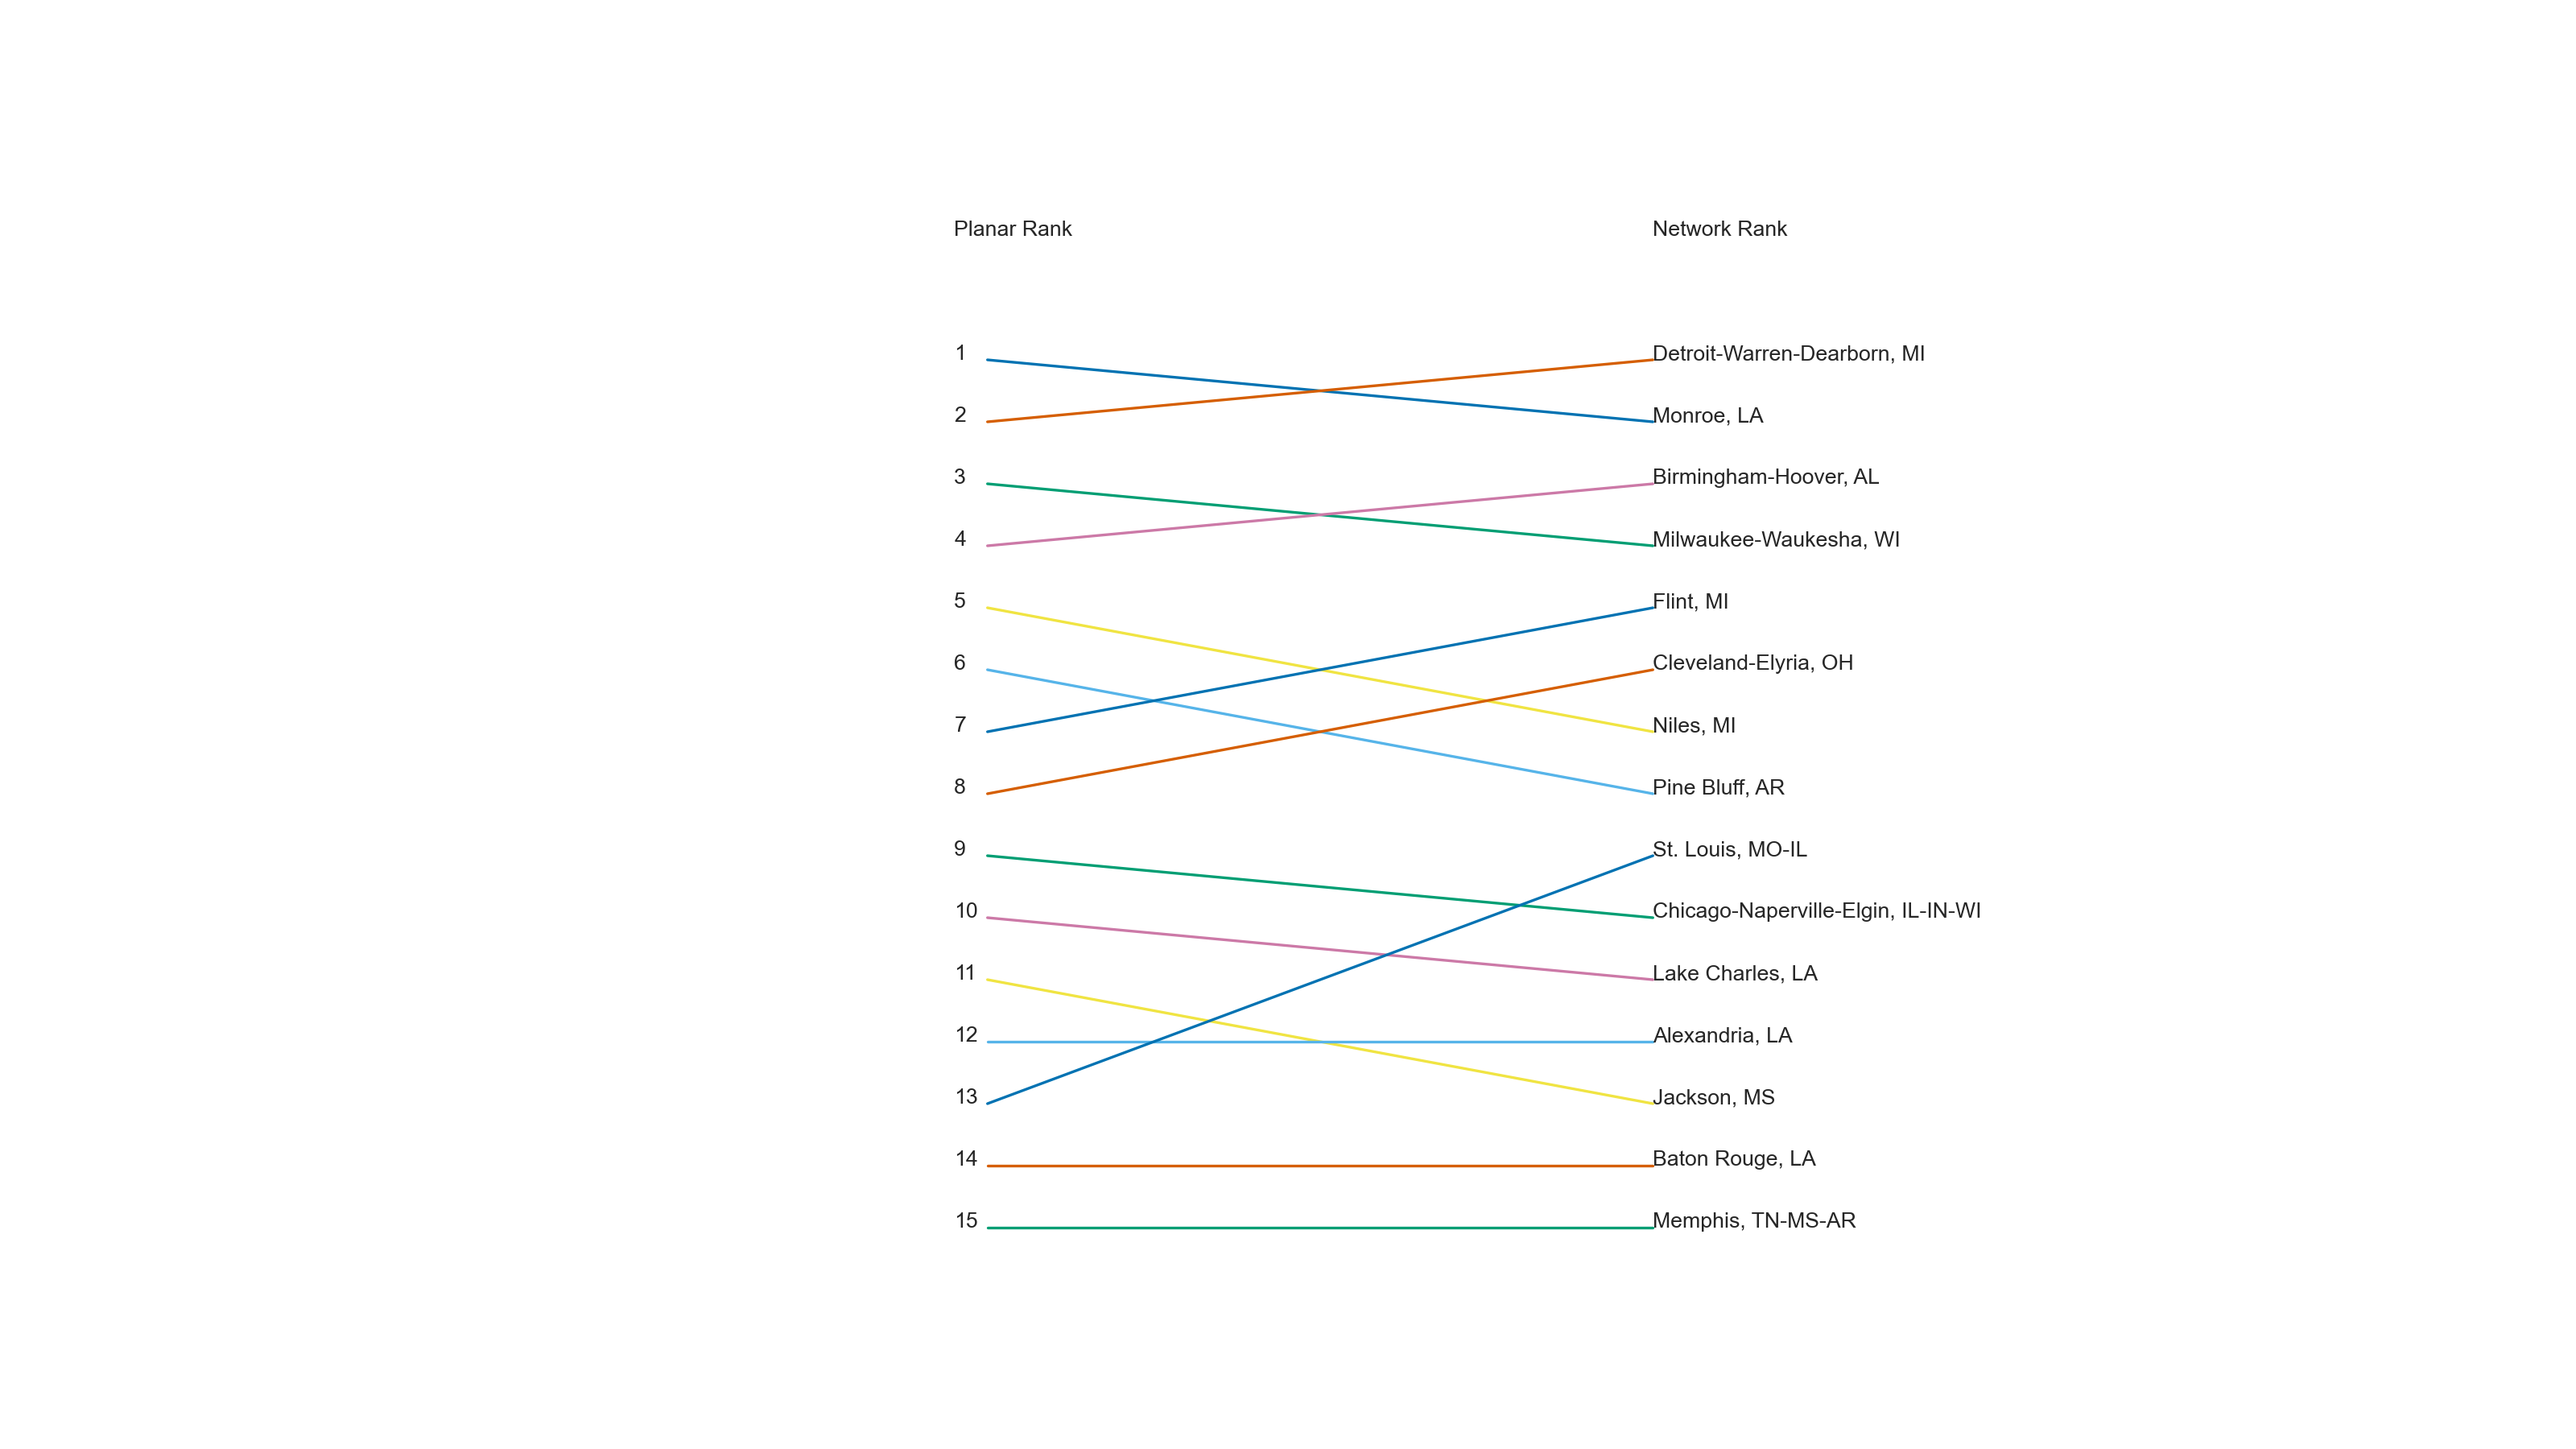

In [28]:
import matplotlib.pyplot as plt
import matplotlib.lines as lines
fig, ax = plt.subplots(figsize=(16,9))
x = np.arange(1, 3)
r = 1
for idx, row in df15.iterrows():
    ax.plot([1, 2], [row['planar'], row['network']])
    ax.annotate(row['name'], xy=(2, row['network']))
    ax.annotate(str(r), xy=(0.95, row['planar']))
    r += 1
    #plt.text(3, row['network'], row['name'])
    
ax.annotate("Planar Rank", xy=(0.95,17))
ax.annotate("Network Rank", xy=(2,17))

plt.xticks([])
plt.yticks([])
ax.set_ylim(0, 18)
ax.set_xlim(0, 3)
ax.axis('off')
plt.savefig('rank15.png', dpi=600)
plt.show()


In [20]:
df.shape

(380, 8)

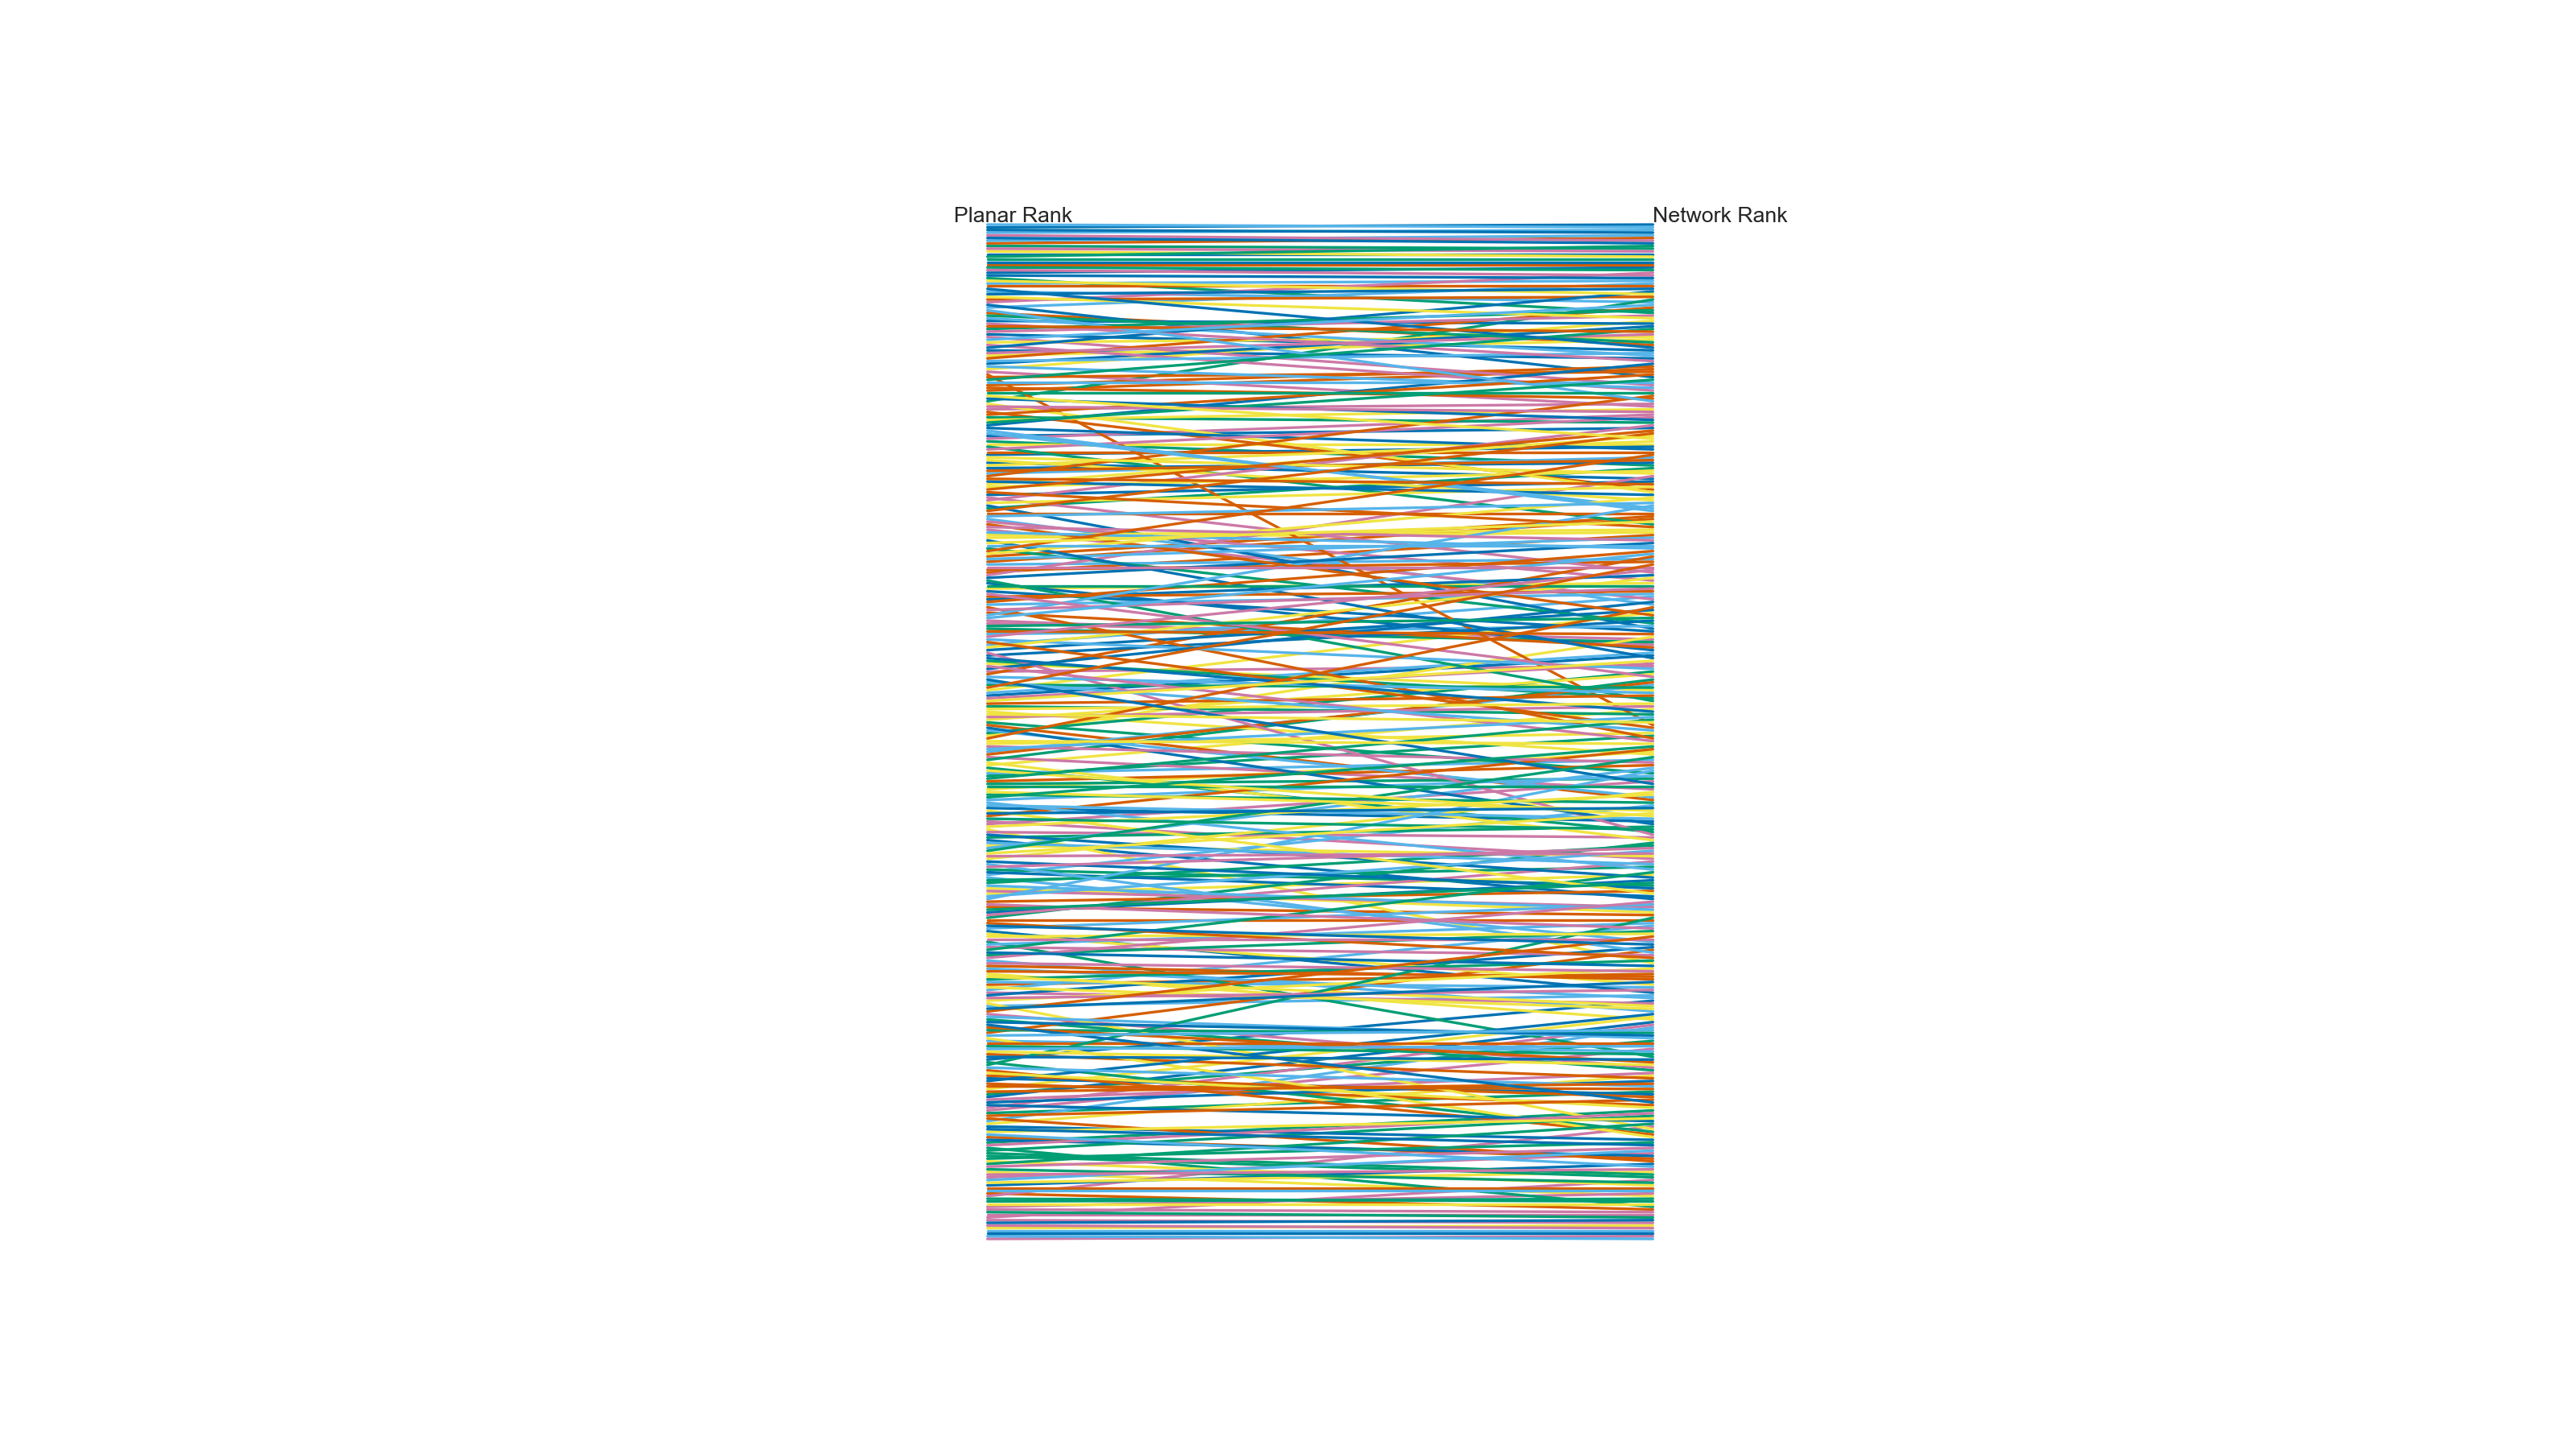

In [29]:

df['planar'] = 381-df.prank
df['network'] = 381-df.nrank
import matplotlib.pyplot as plt
import matplotlib.lines as lines
fig, ax = plt.subplots(figsize=(16,9))
x = np.arange(1, 3)
r = 1
for idx, row in df.iterrows():
    ax.plot([1, 2], [row['planar'], row['network']])
    #ax.annotate(row['name'], xy=(2, row['network']))
    #ax.annotate(str(r), xy=(0.95, row['planar']))
    r += 1
    #plt.text(3, row['network'], row['name'])
    
ax.annotate("Planar Rank", xy=(0.95, 381))
ax.annotate("Network Rank", xy=(2,381))

plt.xticks([])
plt.yticks([])
#ax.set_ylim(0, 18)
ax.set_xlim(0, 3)
ax.axis('off')
plt.savefig('rankall.png', dpi=600)
plt.show()


In [24]:
df.shape

(380, 10)